# Convolutional Network

This notebook shows how to apply convolutional networks to image processing problems

### Import all the needed modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np

### Define the path of the data source for convenience

The data can be downloaded here https://www.kaggle.com/c/digit-recognizer/data

In [2]:
FILE_PATH = 'train.csv'

### Load the dataset and view the first few rows

In [3]:
df = pd.read_csv(FILE_PATH)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert the labels to one-hot encoding

This is needed when working with a multi-label problem since the network will predict the probability for each label

In [4]:
y = df['label'].values
y[:5]

array([1, 0, 1, 4, 0], dtype=int64)

In [5]:
y_encoder = OneHotEncoder(sparse=False)
y_encoded = y_encoder.fit_transform(y.reshape(-1, 1))
y_encoded[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Remove the labels in the set of our input features

The data is reshaped with a fourth dimension. This is because the fourth dimension represents the color bands. For example, a normal image has 3 bands (RGB) and this monochromatic data set only has one

In [6]:
X = df.drop('label', axis=1).values
X = X.reshape(-1, 28, 28, 1)

### Verify the images

Show the data to make sure converted the csv rows to their proper images.

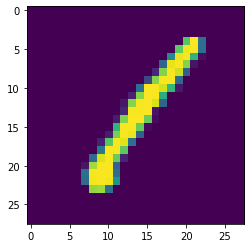

Label: 1


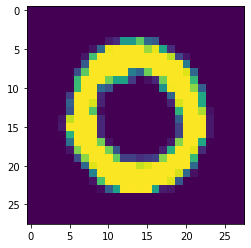

Label: 0


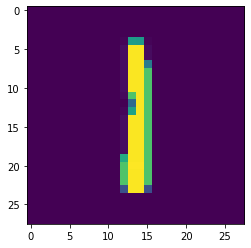

Label: 1


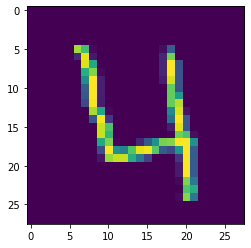

Label: 4


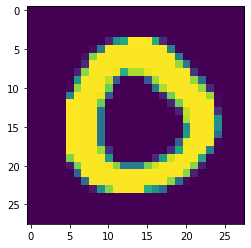

Label: 0


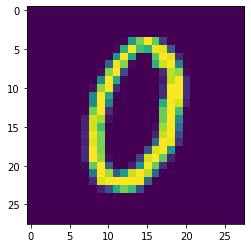

Label: 0


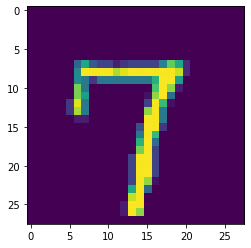

Label: 7


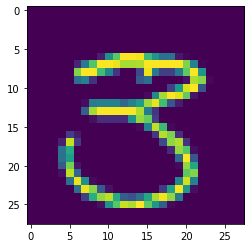

Label: 3


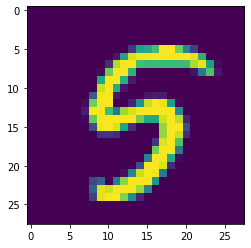

Label: 5


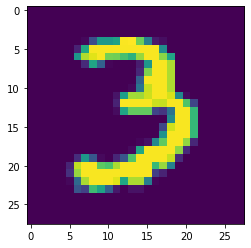

Label: 3


In [7]:
for i in range(10):
    plt.imshow(X[i].reshape(28, 28))
    plt.show()
    print('Label:', y[i])

### Create a Keras model for training

This architecture is similar to a smaller VGG

In [8]:
input_ = tf.keras.Input((28, 28, 1))
conv1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(input_)
conv2 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(conv1)
mp1 = tf.keras.layers.MaxPool2D((2,2))(conv2)
conv3 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(mp1)
conv4 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(conv3)
conv5 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu')(conv4)
mp2 = tf.keras.layers.MaxPool2D((2,2))(conv5)
fl = tf.keras.layers.Flatten()(mp2)
dense1 = tf.keras.layers.Dense(8, activation='relu')(fl)
output = tf.keras.layers.Dense(10, activation='softmax')(dense1)

model = tf.keras.Model(inputs=input_, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 8)           584   

In [9]:
model.compile('adam', 'categorical_crossentropy')

### Fit the model using the training data

It's better to use the callbacks used in the previous notebook to better training results

In [10]:
hst = model.fit(X, y_encoded, batch_size=32, epochs=10, validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 18s 530us/sample - loss: 1.0863 - val_loss: 0.3672
Epoch 2/10
33600/33600 [==============================] - 17s 519us/sample - loss: 0.2920 - val_loss: 0.2175
Epoch 3/10
33600/33600 [==============================] - 18s 527us/sample - loss: 0.1923 - val_loss: 0.1595
Epoch 4/10
33600/33600 [==============================] - 17s 509us/sample - loss: 0.1475 - val_loss: 0.1319
Epoch 5/10
33600/33600 [==============================] - 17s 505us/sample - loss: 0.1224 - val_loss: 0.1388
Epoch 6/10
33600/33600 [==============================] - 17s 509us/sample - loss: 0.1122 - val_loss: 0.1174
Epoch 7/10
33600/33600 [==============================] - 17s 521us/sample - loss: 0.1009 - val_loss: 0.1100
Epoch 8/10
33600/33600 [==============================] - 17s 511us/sample - loss: 0.0930 - val_loss: 0.0949
Epoch 9/10
33600/33600 [==============================] - 17s 515us/sample - lo

### Try out some predictions

It's up to you to try the model performance on a separate training set. The prediction is only done to validate the training operation

In [11]:
predictions = model.predict(X)

In [12]:
predictions[:5]

array([[3.39479972e-11, 9.99946952e-01, 6.35923470e-06, 6.65765176e-09,
        1.12304397e-05, 3.69479812e-06, 6.65804282e-06, 2.25408658e-05,
        2.22528911e-06, 3.37991111e-07],
       [9.99974132e-01, 1.57360537e-16, 2.95536211e-07, 1.86493668e-11,
        5.44611794e-06, 4.72910472e-07, 4.71765634e-06, 7.69500375e-09,
        5.42170710e-07, 1.42498802e-05],
       [3.97683708e-09, 9.99532938e-01, 6.76191266e-05, 4.98600741e-07,
        9.10454764e-05, 2.80236764e-05, 7.76806191e-05, 6.48756904e-05,
        1.34081245e-04, 3.49106836e-06],
       [4.52324515e-03, 1.79566473e-06, 2.03648931e-03, 1.83530389e-07,
        9.88372862e-01, 3.68674082e-05, 4.29825485e-03, 4.09103595e-05,
        1.96778768e-04, 4.92674415e-04],
       [9.99998093e-01, 1.88274166e-18, 1.00444275e-07, 4.86622461e-13,
        5.73784632e-07, 1.90429319e-07, 8.04142587e-07, 7.06827596e-10,
        1.10850866e-08, 1.72143430e-07]], dtype=float32)

### Convert the probabilities to labels

Get the index of the largest probability per row

In [13]:
labels = np.argmax(predictions, axis=1)
labels[:5]

array([1, 0, 1, 4, 0], dtype=int64)